Variables and libraries

In [94]:
# LIBRARIES
import os
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

# SET CREDENTIALS
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# USE CREDENTIALS
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

Import spotify libraries and config credentials

In [95]:
#STEP 1: CREATE FUNCTION TO GET DATA FROM SPOTIFY
def info_top_tracks(artist_id):
    #set variables
    top_tracks = sp.artist_top_tracks(artist_id)
    #filter data
    tracks = top_tracks['tracks']
    data = [{'name': track['name'], #song name 
             'popularity':track['popularity'], #song popularity
             'duration':round(track['duration_ms']/(1000*60),2)
             } for track in tracks]
    #create dataframe
    data = pd.DataFrame(data)
    return data

#SETP 2: SELECT ARTIST
artist_id = '3qm84nBOXUEQ2vnTfUTTFC' #I chose guns n' roses

#STEP 3: APPLY
total_data = info_top_tracks(artist_id)

Analyze results

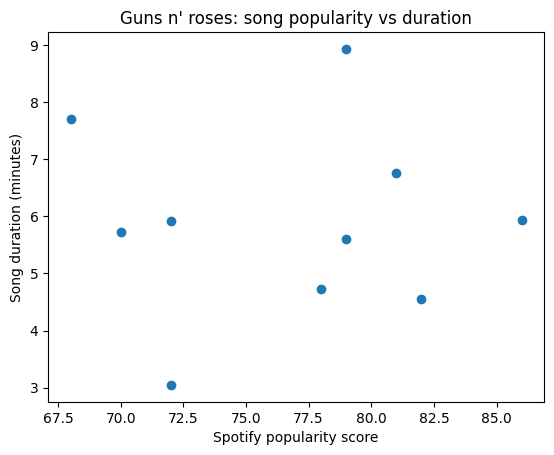

In [96]:
#Scatter plot
plt.scatter(total_data.popularity,total_data.duration)
plt.xlabel('Spotify popularity score')
plt.ylabel('Song duration (minutes)')
plt.title("Guns n' roses: song popularity vs duration")
plt.show()

According to the graph above, it seems that it does not exist a correlation between the song duration and its popularity score. There are songs that share the same duration and have a different popularity. Also, there are songs that share the same popularity score and have a different duration. 